# Part 1


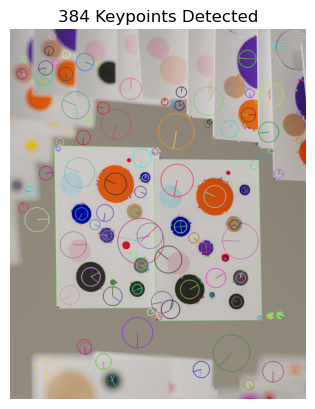

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/example-image.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

keypoints = sift.detect(gray, None)

output_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title(f"{len(keypoints)} Keypoints Detected")
plt.axis('off')
plt.show()

# Part 2


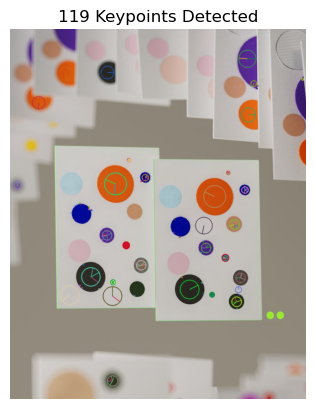

In [2]:


img = cv2.imread('images/example-image.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create(contrastThreshold=0.1, edgeThreshold=16, sigma=1.9)

keypoints = sift.detect(gray, None)

output_img = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.title(f"{len(keypoints)} Keypoints Detected")
plt.axis('off')
plt.show()

# Part 3


Descriptor shape: (119, 128)
First descriptor:
 [  0.   0.   0.   2.   2.   8. 124.  67.   0.   1.  29.  21.   1.   1.
 124.  77.   0.   7.  37.   9.  62.  79.  85.  15.   0.   0.   1.   1.
 123.  99.   6.   0.   0.   0.   0.  27.  51.   9.  37.   8.   5.  21.
 121. 124. 119.  17.   9.   4.  86. 124. 124.  38.  39.  20.   3.   9.
  18.  10.   3.   2.  69. 124.  61.   4.   0.   0.   0.   4.  72.  30.
   1.   0.   9.   6.   8.  37. 124. 124.   9.   9. 124.  35.   9.   7.
  14.  29.  12.  39.  35.   3.   0.   0.   0.  23.  28.   5.   0.   0.
   0.   0.   4.   3.   0.   0.   0.   0.   0.   0.  10.   8.   0.   0.
   1.   0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]
Keypoint info: (16.07216453552246, 337.9917907714844) 14.885313034057617 100.97463989257812


(np.float64(-0.5), np.float64(13.5), np.float64(13.5), np.float64(-0.5))

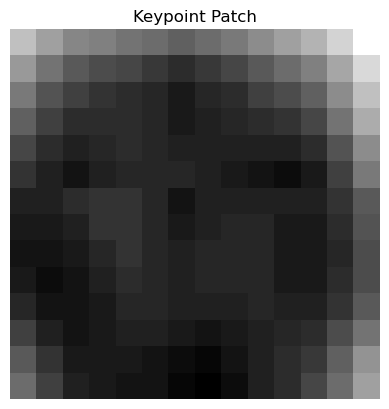

In [3]:

keypoints, descriptors = sift.compute(gray, keypoints)
print("Descriptor shape:", descriptors.shape)  # Should be (number_of_keypoints, 128)
np.set_printoptions(precision=3, suppress=True)
print("First descriptor:\n", descriptors[0])


#Pick one key 

kpt = keypoints[0]
print("Keypoint info:", kpt.pt, kpt.size, kpt.angle)

x, y = map(int, kpt.pt)

size = int(kpt.size / 2)

patch = gray[y-size:y+size, x-size:x+size]

plt.imshow(patch, cmap='gray')
plt.title("Keypoint Patch")
plt.axis('off')

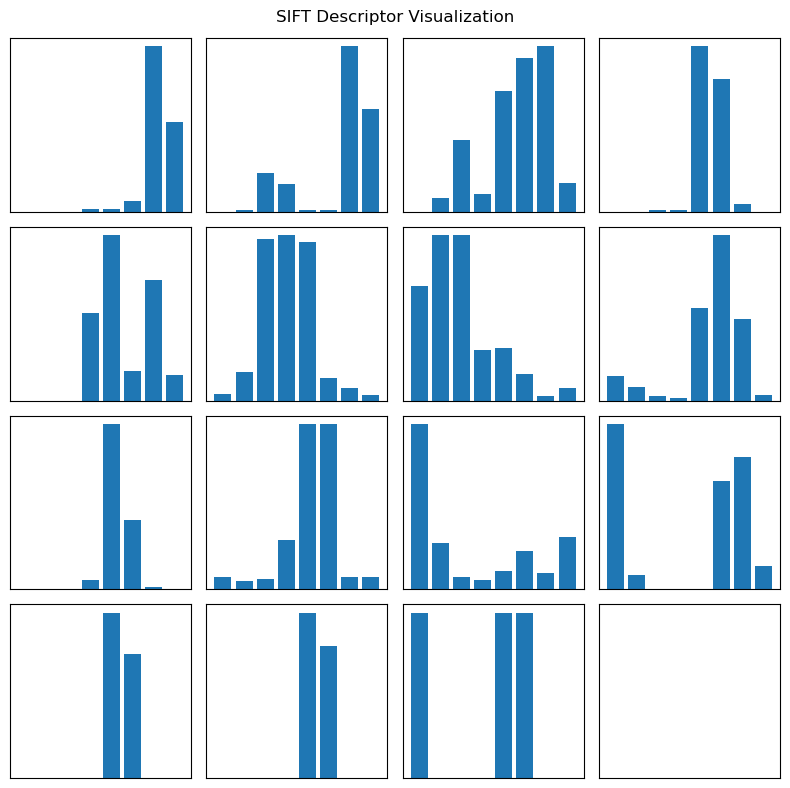

In [4]:
def visualize_descriptor(descriptor):
    descriptor_img = descriptor.reshape(4,4,8)
    fig , axes = plt.subplots(4,4, figsize=(8,8))
    for i in range(4):
        for j in range(4):
            axes[i,j].bar(np.arange(8), descriptor_img[i,j])
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
    plt.suptitle("SIFT Descriptor Visualization")
    plt.tight_layout()
    plt.show()

visualize_descriptor(descriptors[0])


# Part 4


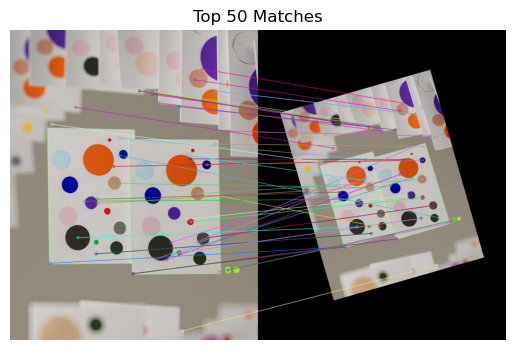

In [5]:
img = cv2.imread("images/example-image.jpg")

rows, cols = img.shape[:2]

# Rotate by 18 degrees around the center
M = cv2.getRotationMatrix2D((cols/2,rows/2),16,.63) 
rotation = cv2.warpAffine(img,M,(cols  ,rows ))

gray_rotation = cv2.cvtColor(rotation, cv2.COLOR_BGR2GRAY)
cv2.imwrite("images/example-image-rotated.jpg", gray)


sift = cv2.SIFT_create()

#Detect and compute
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
keypoints, descriptors = sift.detectAndCompute(gray, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray_rotation, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(img, keypoints, rotation, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title("Top 50 Matches")
plt.axis('off')
plt.show()
